In [1]:
import pandas as pd
import data_loader as dl
import seaborn as sns
import numpy as np
import numbers
import statistics as st
import matplotlib.pyplot as plt
import ast

RDKit WARNING: [08:57:02] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def get_matched_intensities(row):
    intensities = []
    line = row["Matched Ion Intensities"].split(";")
        
    for el in line:
        el = el.strip('][').split(",")
        for sub_el in el:
            sub_el = sub_el.split(":")[1]
            intensities.append(sub_el)
    return intensities

In [3]:
def get_top3_ann(row):
    row['ann_intensities'].sort(key=int, reverse=True)

    return3 = row['ann_intensities'][:3]
    return3 = [float(i) for i in return3]
    
    return return3

In [4]:
def calc_top3_avg(row):
    average = np.mean(list(row['top3']))
    return average

In [5]:
def get_all_intensities(row):
    new_array = ast.literal_eval(row['intensity_array'])
    return new_array

In [6]:
def non_ann_intentisites(row):
    intensities = row['all_intensities']
    ann_inten = row['ann_intensities']
    non_ann = set(intensities) - set(ann_inten)
    return list(non_ann)

In [7]:
def nonannotated_median(row):
    median = np.nanmedian(list(row['nonann_intensities']))
    return median

In [8]:
def get_nonannotated_median(df):
    df["all_intensities"] = df.apply(get_all_intensities, axis=1)
    df["nonann_intensities"] = df.apply(non_ann_intentisites, axis=1)
    df['nonann_median'] = df.apply(nonannotated_median, axis=1)
    return df

In [9]:
def get_top3_average(df):  
    df["ann_intensities"] = df.apply(get_matched_intensities, axis=1)
    df["top3"] = df.apply(get_top3_ann, axis=1)
    df['top3_average'] = df.apply(calc_top3_avg, axis=1)
    return df

In [10]:
 #Read in data
bulk_rep1 = dl.load_joined_psm_mzml('bulk_rep1')[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
bulk_rep2 = dl.load_joined_psm_mzml('bulk_rep2')[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
bulk_rep3 = dl.load_joined_psm_mzml('bulk_rep3')[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]

rep1_2ng = dl.load_joined_psm_mzml("2ng_rep1")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep2_2ng = dl.load_joined_psm_mzml("2ng_rep2")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep3_2ng = dl.load_joined_psm_mzml("2ng_rep3")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep4_2ng = dl.load_joined_psm_mzml("2ng_rep4")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep5_2ng = dl.load_joined_psm_mzml("2ng_rep5")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep6_2ng = dl.load_joined_psm_mzml("2ng_rep6")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]

rep1_02ng = dl.load_joined_psm_mzml("0.2ng_rep1")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep2_02ng = dl.load_joined_psm_mzml("0.2ng_rep2")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep3_02ng = dl.load_joined_psm_mzml("0.2ng_rep3")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep4_02ng = dl.load_joined_psm_mzml("0.2ng_rep4")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep5_02ng = dl.load_joined_psm_mzml("0.2ng_rep5")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]
rep6_02ng = dl.load_joined_psm_mzml("0.2ng_rep6")[['peptide','minute','Matched Ion Intensities','probability', 'intensity_array']]

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (12,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (12,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (12,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda

In [11]:
#filter based on retention time gradient
rep1_2ng = rep1_2ng[(rep1_2ng['minute'] < 95) & (rep1_2ng['minute'] >= 27)]
rep2_2ng = rep2_2ng[(rep2_2ng['minute'] < 95) & (rep2_2ng['minute'] >=27)]
rep3_2ng = rep3_2ng[(rep3_2ng['minute'] < 93) & (rep3_2ng['minute'] >=32)]
rep4_2ng = rep4_2ng[(rep4_2ng['minute'] < 91) & (rep4_2ng['minute'] >=32)]
rep5_2ng = rep5_2ng[(rep5_2ng['minute'] < 99) & (rep5_2ng['minute'] >=31)]
rep6_2ng = rep6_2ng[(rep6_2ng['minute'] < 98) & (rep6_2ng['minute'] >=31)]

rep1_02ng = rep1_02ng[(rep1_02ng['minute'] < 94) & (rep1_02ng['minute'] >=28)]
rep2_02ng = rep2_02ng[(rep2_02ng['minute'] < 95) & (rep2_02ng['minute'] >=27)]
rep3_02ng = rep3_02ng[(rep3_02ng['minute'] < 98) & (rep3_02ng['minute'] >=32)]
rep4_02ng = rep4_02ng[(rep4_02ng['minute'] < 98) & (rep4_02ng['minute'] >=32)]
rep5_02ng = rep5_02ng[(rep5_02ng['minute'] < 109) & (rep5_02ng['minute'] >=35)]
rep6_02ng = rep6_02ng[(rep6_02ng['minute'] < 109) & (rep6_02ng['minute'] >=35)]

In [12]:
bulk_rep1 = get_top3_average(bulk_rep1)
bulk_rep2 = get_top3_average(bulk_rep2)
bulk_rep3 = get_top3_average(bulk_rep3)

rep1_2ng = get_top3_average(rep1_2ng)
rep2_2ng = get_top3_average(rep2_2ng)
rep3_2ng = get_top3_average(rep3_2ng)
rep4_2ng = get_top3_average(rep4_2ng)
rep5_2ng = get_top3_average(rep5_2ng)
rep6_2ng = get_top3_average(rep6_2ng)

rep1_02ng = get_top3_average(rep1_02ng)
rep2_02ng = get_top3_average(rep2_02ng)
rep3_02ng = get_top3_average(rep3_02ng)
rep4_02ng = get_top3_average(rep4_02ng)
rep5_02ng = get_top3_average(rep5_02ng)
rep6_02ng = get_top3_average(rep6_02ng)

In [13]:
bulk_rep1 = get_nonannotated_median(bulk_rep1)
bulk_rep2 = get_nonannotated_median(bulk_rep2)
bulk_rep3 = get_nonannotated_median(bulk_rep3)

rep1_2ng = get_nonannotated_median(rep1_2ng)
rep2_2ng = get_nonannotated_median(rep2_2ng)
rep3_2ng = get_nonannotated_median(rep3_2ng)
rep4_2ng = get_nonannotated_median(rep4_2ng)
rep5_2ng = get_nonannotated_median(rep5_2ng)
rep6_2ng = get_nonannotated_median(rep6_2ng)

rep1_02ng = get_nonannotated_median(rep1_02ng)
rep2_02ng = get_nonannotated_median(rep2_02ng)
rep3_02ng = get_nonannotated_median(rep3_02ng)
rep4_02ng = get_nonannotated_median(rep4_02ng)
rep5_02ng = get_nonannotated_median(rep5_02ng)
rep6_02ng = get_nonannotated_median(rep6_02ng)

In [14]:
bulk_rep1['ann_top3/nonann_median'] = bulk_rep1['top3_average']/bulk_rep1['nonann_median']
bulk_rep2['ann_top3/nonann_median'] = bulk_rep2['top3_average']/bulk_rep2['nonann_median']
bulk_rep3['ann_top3/nonann_median'] = bulk_rep3['top3_average']/bulk_rep3['nonann_median']

rep1_2ng['ann_top3/nonann_median'] = rep1_2ng['top3_average']/rep1_2ng['nonann_median']
rep2_2ng['ann_top3/nonann_median'] = rep2_2ng['top3_average']/rep2_2ng['nonann_median']
rep3_2ng['ann_top3/nonann_median'] = rep3_2ng['top3_average']/rep3_2ng['nonann_median']
rep4_2ng['ann_top3/nonann_median'] = rep4_2ng['top3_average']/rep4_2ng['nonann_median']
rep5_2ng['ann_top3/nonann_median'] = rep5_2ng['top3_average']/rep5_2ng['nonann_median']
rep6_2ng['ann_top3/nonann_median'] = rep6_2ng['top3_average']/rep6_2ng['nonann_median']

rep1_02ng['ann_top3/nonann_median'] = rep1_02ng['top3_average']/rep1_02ng['nonann_median']
rep2_02ng['ann_top3/nonann_median'] = rep2_02ng['top3_average']/rep2_02ng['nonann_median']
rep3_02ng['ann_top3/nonann_median'] = rep3_02ng['top3_average']/rep3_02ng['nonann_median']
rep4_02ng['ann_top3/nonann_median'] = rep4_02ng['top3_average']/rep4_02ng['nonann_median']
rep5_02ng['ann_top3/nonann_median'] = rep5_02ng['top3_average']/rep5_02ng['nonann_median']
rep6_02ng['ann_top3/nonann_median'] = rep6_02ng['top3_average']/rep6_02ng['nonann_median']


In [15]:
#seprate good and medicore spectra
bulk_rep1_good = bulk_rep1[bulk_rep1['probability'] <= .01][['peptide','ann_top3/nonann_median']]
bulk_rep2_good = bulk_rep2[bulk_rep2['probability'] <= .01][['peptide','ann_top3/nonann_median']]
bulk_rep3_good = bulk_rep3[bulk_rep3['probability'] <= .01][['peptide','ann_top3/nonann_median']]

rep1_2ng_good = rep1_2ng[rep1_2ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep2_2ng_good = rep2_2ng[rep2_2ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep3_2ng_good = rep3_2ng[rep3_2ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep4_2ng_good = rep4_2ng[rep4_2ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep5_2ng_good = rep5_2ng[rep5_2ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep6_2ng_good = rep6_2ng[rep6_2ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]

rep1_02ng_good = rep1_02ng[rep1_02ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep2_02ng_good = rep2_02ng[rep2_02ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep3_02ng_good = rep3_02ng[rep3_02ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep4_02ng_good = rep4_02ng[rep4_02ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep5_02ng_good = rep5_02ng[rep5_02ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]
rep6_02ng_good = rep6_02ng[rep6_02ng['probability'] <= .01][['peptide','ann_top3/nonann_median']]

rep1_2ng_med = rep1_2ng[(rep1_2ng['probability'] > .01) & (rep1_2ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep2_2ng_med = rep2_2ng[(rep2_2ng['probability'] > .01) & (rep2_2ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep3_2ng_med = rep3_2ng[(rep3_2ng['probability'] > .01) & (rep3_2ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep4_2ng_med = rep4_2ng[(rep4_2ng['probability'] > .01) & (rep4_2ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep5_2ng_med = rep5_2ng[(rep5_2ng['probability'] > .01) & (rep5_2ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep6_2ng_med = rep6_2ng[(rep6_2ng['probability'] > .01) & (rep6_2ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]

rep1_02ng_med = rep1_02ng[(rep1_02ng['probability'] > .01) & (rep1_02ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep2_02ng_med = rep2_02ng[(rep2_02ng['probability'] > .01) & (rep2_02ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep3_02ng_med = rep3_02ng[(rep3_02ng['probability'] > .01) & (rep3_02ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep4_02ng_med = rep4_02ng[(rep4_02ng['probability'] > .01) & (rep4_02ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep5_02ng_med = rep5_02ng[(rep5_02ng['probability'] > .01) & (rep5_02ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]
rep6_02ng_med = rep6_02ng[(rep6_02ng['probability'] > .01) & (rep6_02ng['probability'] <= .2)][['peptide','ann_top3/nonann_median']]



In [16]:
#for each file get the ann_top3/nonann_median for each time a peptide is seen
bulk_rep1_good = bulk_rep1_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
bulk_rep2_good = bulk_rep2_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
bulk_rep3_good = bulk_rep3_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_2ng_good = rep1_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_2ng_good = rep2_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_2ng_good = rep3_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_2ng_good = rep4_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_2ng_good = rep5_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_2ng_good = rep6_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_2ng_med = rep1_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_2ng_med = rep2_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_2ng_med = rep3_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_2ng_med = rep4_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_2ng_med = rep5_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_2ng_med = rep6_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_02ng_good = rep1_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_02ng_good = rep2_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_02ng_good = rep3_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_02ng_good = rep4_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_02ng_good = rep5_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_02ng_good = rep6_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()

rep1_02ng_med = rep1_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep2_02ng_med = rep2_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep3_02ng_med = rep3_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep4_02ng_med = rep4_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep5_02ng_med = rep5_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
rep6_02ng_med = rep6_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()



In [17]:
#change index to be peptide
bulk_rep1_good = bulk_rep1_good.set_index("peptide")
bulk_rep2_good = bulk_rep2_good.set_index("peptide")
bulk_rep3_good = bulk_rep3_good.set_index("peptide")

rep1_2ng_good = rep1_2ng_good.set_index("peptide")
rep2_2ng_good = rep2_2ng_good.set_index("peptide")
rep3_2ng_good = rep3_2ng_good.set_index("peptide")
rep4_2ng_good = rep4_2ng_good.set_index("peptide")
rep5_2ng_good = rep5_2ng_good.set_index("peptide")
rep6_2ng_good = rep6_2ng_good.set_index("peptide")

rep1_2ng_med = rep1_2ng_med.set_index("peptide")
rep2_2ng_med = rep2_2ng_med.set_index("peptide")
rep3_2ng_med = rep3_2ng_med.set_index("peptide")
rep4_2ng_med = rep4_2ng_med.set_index("peptide")
rep5_2ng_med = rep5_2ng_med.set_index("peptide")
rep6_2ng_med = rep6_2ng_med.set_index("peptide")

rep1_02ng_good = rep1_02ng_good.set_index("peptide")
rep2_02ng_good = rep2_02ng_good.set_index("peptide")
rep3_02ng_good = rep3_02ng_good.set_index("peptide")
rep4_02ng_good = rep4_02ng_good.set_index("peptide")
rep5_02ng_good = rep5_02ng_good.set_index("peptide")
rep6_02ng_good = rep6_02ng_good.set_index("peptide")

rep1_02ng_med = rep1_02ng_med.set_index("peptide")
rep2_02ng_med = rep2_02ng_med.set_index("peptide")
rep3_02ng_med = rep3_02ng_med.set_index("peptide")
rep4_02ng_med = rep4_02ng_med.set_index("peptide")
rep5_02ng_med = rep5_02ng_med.set_index("peptide")
rep6_02ng_med = rep6_02ng_med.set_index("peptide")

In [18]:
#merge
#from here on bulk has been filtered for quality scans
bulk_allreps = pd.concat([bulk_rep1_good, bulk_rep2_good], join='outer')
bulk_allreps = pd.concat([bulk_allreps, bulk_rep3_good], join='outer')

allreps_2ng_good = pd.concat([rep1_2ng_good, rep2_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep3_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep4_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep5_2ng_good], join='outer')
allreps_2ng_good = pd.concat([allreps_2ng_good, rep6_2ng_good], join='outer')

allreps_02ng_good = pd.concat([rep1_02ng_good, rep2_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep3_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep4_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep5_02ng_good], join='outer')
allreps_02ng_good = pd.concat([allreps_02ng_good, rep6_02ng_good], join='outer')

allreps_2ng_med = pd.concat([rep1_2ng_med, rep2_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep3_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep4_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep5_2ng_med], join='outer')
allreps_2ng_med = pd.concat([allreps_2ng_med, rep6_2ng_med], join='outer')

allreps_02ng_med = pd.concat([rep1_02ng_med, rep2_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep3_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep4_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep5_02ng_med], join='outer')
allreps_02ng_med = pd.concat([allreps_02ng_med, rep6_02ng_med], join='outer')

In [19]:
bulk_allreps = bulk_allreps.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_2ng_good = allreps_2ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_2ng_med = allreps_2ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_02ng_good = allreps_02ng_good.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()
allreps_02ng_med = allreps_02ng_med.groupby(['peptide'])['ann_top3/nonann_median'].apply(lambda x: ','.join(x.astype(str))).reset_index()



In [20]:
def calc_aver_top3_to_median_ratio(row):
    all_counts = row['ann_top3/nonann_median']
    all_counts = all_counts.split(',')
    all_counts = list(map(float, all_counts))
    count_mean = np.nanmean(all_counts)
    return count_mean

In [21]:
bulk_allreps['mean_inten_diff'] = bulk_allreps.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_2ng_good['mean_inten_diff'] = allreps_2ng_good.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_2ng_med['mean_inten_diff'] = allreps_2ng_med.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_02ng_good['mean_inten_diff'] = allreps_02ng_good.apply(calc_aver_top3_to_median_ratio, axis=1)
allreps_02ng_med['mean_inten_diff'] = allreps_02ng_med.apply(calc_aver_top3_to_median_ratio, axis=1)



In [22]:
bulk_allreps = bulk_allreps.set_index("peptide")
allreps_2ng_good = allreps_2ng_good.set_index("peptide")
allreps_2ng_med = allreps_2ng_med.set_index("peptide")
allreps_02ng_good = allreps_02ng_good.set_index("peptide")
allreps_02ng_med = allreps_02ng_med.set_index("peptide")

In [23]:
#outer join all together based on peptide
bulk_allreps.columns = [str(col) + '_bulk' for col in bulk_allreps.columns]
allreps_2ng_good.columns = [str(col) + '_2ng_good' for col in allreps_2ng_good.columns]
allreps_2ng_med.columns = [str(col) + '_2ng_med' for col in allreps_2ng_med.columns]
allreps_02ng_good.columns = [str(col) + '_0.2ng_good' for col in allreps_02ng_good.columns]
allreps_02ng_med.columns = [str(col) + '_0.2ng_med' for col in allreps_02ng_med.columns]

megatable = pd.concat([bulk_allreps, allreps_2ng_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_2ng_med], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_02ng_good], axis=1, join='outer')
megatable = pd.concat([megatable, allreps_02ng_med], axis=1, join='outer')

In [24]:
megatable

,ann_top3/nonann_median_bulk,mean_inten_diff_bulk,ann_top3/nonann_median_2ng_good,mean_inten_diff_2ng_good,ann_top3/nonann_median_2ng_med,mean_inten_diff_2ng_med,ann_top3/nonann_median_0.2ng_good,mean_inten_diff_0.2ng_good,ann_top3/nonann_median_0.2ng_med,mean_inten_diff_0.2ng_med
AAAAAAAAAAAAAAAGAGAGAK,"5.511981874739533,4.988483842244098,8.69147858...",6.397315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,"22.267654595647276,54.910389899192204,36.96670...",33.910217,"4.947682594149982,7.871731614219018,6.59864849...",7.189399,NaN,NaN,"2.7639525712926014,3.9579453120912746",3.360949,NaN,NaN
AAAAAAAAAVSR,"52.06181751105902,12.690423625977061",32.376121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAAAAAALQAK,"18.813714449020825,8.401920549112035,27.136053...",18.366508,"31.83660705115729,15.621140039211134,13.904680...",35.214680,NaN,NaN,"23.993175352640662,31.876517577228018,23.52699...",18.578702,NaN,NaN
AAAAATVVPPMVGGPPFVGPVGFGPGDR,"6.7440827011659366,12.305449349384604,29.25569...",16.008555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
VTGSAMVDDEKR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7.495263534053384,6.987060163586166",7.241162
WGPRNIRDIK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.436082790703859,15.436083
YDDMAAAM+15.995K|YDDMAAAM+15.995K|YDDMASAMK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5329657483134085,1.532966
YLAAGLDELK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.597051940958716,3.597052


In [25]:
df_2ng_good = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_2ng_good']]
df_2ng_good['2ng quality'] = df_2ng_good['mean_inten_diff_bulk']/df_2ng_good['mean_inten_diff_2ng_good']

df_2ng_med = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_2ng_med']]
df_2ng_med['2ng mediocre'] = df_2ng_med['mean_inten_diff_bulk']/df_2ng_med['mean_inten_diff_2ng_med']

df_02ng_good = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_0.2ng_good']]
df_02ng_good['0.2ng quality'] = df_02ng_good['mean_inten_diff_bulk']/df_02ng_good['mean_inten_diff_0.2ng_good']

df_02ng_med = megatable[['mean_inten_diff_bulk', 'mean_inten_diff_0.2ng_med']]
df_02ng_med['0.2ng mediocre'] = df_02ng_med['mean_inten_diff_bulk']/df_02ng_med['mean_inten_diff_0.2ng_med']


kde_df = pd.concat([df_2ng_good[['2ng quality']],df_02ng_good[['0.2ng quality']]], axis=1)
kde_df = pd.concat([kde_df, df_2ng_med[['2ng mediocre']]], axis=1)
kde_df = pd.concat([kde_df, df_02ng_med[['0.2ng mediocre']]], axis=1)

<ipython-input-25-423f0ce44484>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2ng_good['2ng quality'] = df_2ng_good['mean_inten_diff_bulk']/df_2ng_good['mean_inten_diff_2ng_good']
<ipython-input-25-423f0ce44484>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2ng_med['2ng mediocre'] = df_2ng_med['mean_inten_diff_bulk']/df_2ng_med['mean_inten_diff_2ng_med']
<ipython-input-25-423f0ce44484>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

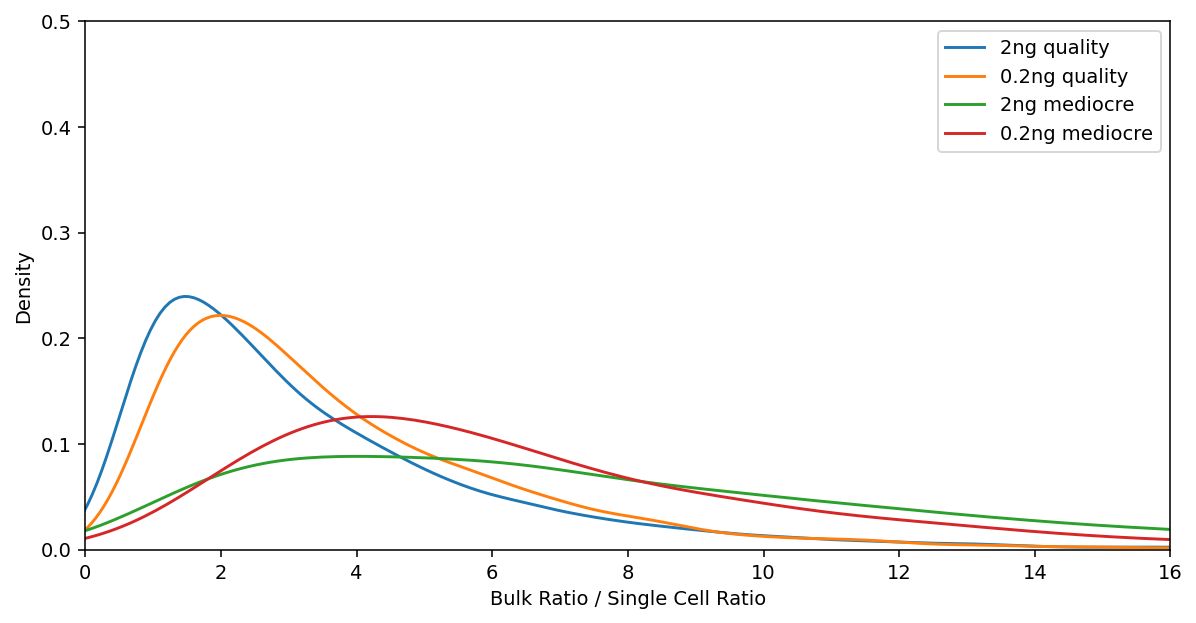

In [26]:
plt.rcParams["figure.dpi"] = 140
ax = kde_df.plot.kde(figsize=(10, 5))
ax.set_xlim(-1, 20)
plt.xticks([0,2,4,6,8,10,12,14,16,18])
ax.set_title("")
fig1 = plt.gcf()
plt.xlim(0,16)
plt.ylim(0,0.5)
plt.xlabel('Bulk Ratio / Single Cell Ratio')
plt.show()

In [27]:
fig1.savefig('annotated_vs_nonannotated.jpg')